<a href="https://colab.research.google.com/github/mohamedamr13/Machine-Learning-/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.cluster import AgglomerativeClustering 

In [2]:
df = pd.read_csv('CC GENERAL.csv')
df.isnull().sum()


CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [ ]:
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [3]:
df['MINIMUM_PAYMENTS'].fillna( df['MINIMUM_PAYMENTS'].mean() , inplace = True )
df['CREDIT_LIMIT'].fillna( df['CREDIT_LIMIT'].mean() , inplace = True )

df['CUST_ID'].describe()
df.isnull().sum()

CUST_ID                             0
BALANCE                             0
BALANCE_FREQUENCY                   0
PURCHASES                           0
ONEOFF_PURCHASES                    0
INSTALLMENTS_PURCHASES              0
CASH_ADVANCE                        0
PURCHASES_FREQUENCY                 0
ONEOFF_PURCHASES_FREQUENCY          0
PURCHASES_INSTALLMENTS_FREQUENCY    0
CASH_ADVANCE_FREQUENCY              0
CASH_ADVANCE_TRX                    0
PURCHASES_TRX                       0
CREDIT_LIMIT                        0
PAYMENTS                            0
MINIMUM_PAYMENTS                    0
PRC_FULL_PAYMENT                    0
TENURE                              0
dtype: int64

In [4]:
# Removing the 'C' from the CUST_ID for the model to analyze remaining number 

'C100'[1:]

remove_initial = lambda string : string[1:]
df['CUST_ID'] = df['CUST_ID'].apply( remove_initial )
df['CUST_ID'] = df['CUST_ID'].apply( lambda x : float(x) )
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   float64
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

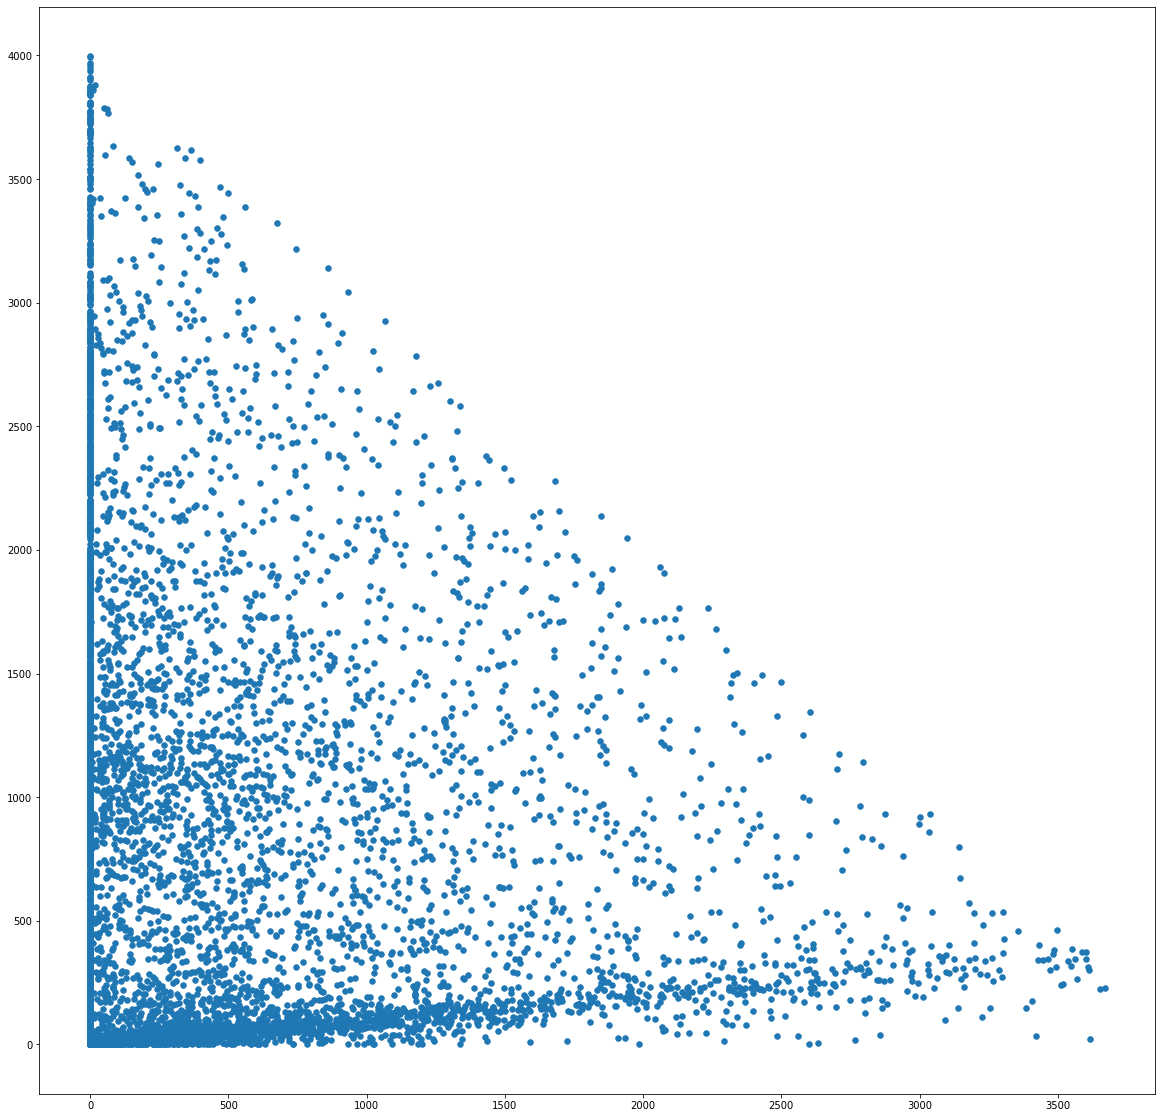

In [7]:
df.drop( df[df['BALANCE'] > (4000-df['PURCHASES']) ].index , inplace= True )
plt.figure(figsize=(20,20))
plt.scatter(df['PURCHASES'] , df['BALANCE'] , s = 30)

In [ ]:
model=AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='complete')
clust_labels=model.fit_predict(df)  



In [ ]:
hirarchial =pd.DataFrame(clust_labels)
hirarchial


,0
0,0
1,0
2,0
3,0
4,0
...,...
8046,0
8047,0
8048,0
8049,0


Plotting Dendogram

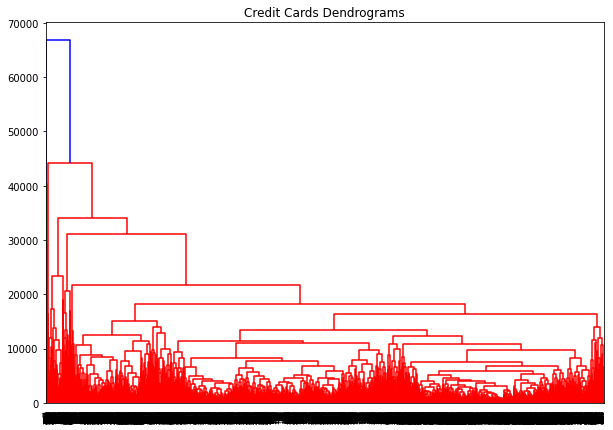

In [ ]:
import scipy.cluster.hierarchy as shc

plt.figure(figsize=(10,7))
plt.title("Credit Cards Dendrograms")
dend=shc.dendrogram(shc.linkage(df, method="complete"))

In [9]:
from sklearn.cluster import KMeans  #Importing our clustering algorithm: KMeans
kmeans=KMeans(n_clusters=5, random_state=0)  #Cluster our data by choosing 5 as number of clusters
kmeans.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [10]:
labels=pd.DataFrame(kmeans.labels_)
labels


,0
0,2
1,1
2,3
3,3
4,2
...,...
7184,0
7185,0
7186,0
7187,0


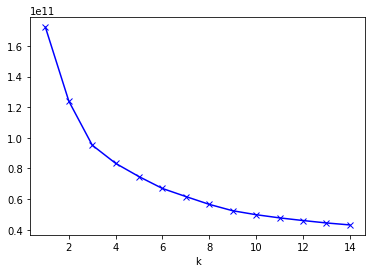

In [11]:
sum = [] 
R = range(1,15)
for k in R:
  kmeansTemp=KMeans(n_clusters=k)  
  kmeansTemp.fit(df)
  sum.append(kmeansTemp.inertia_)
sum

plt.plot( R , sum , 'bx-')
plt.xlabel('k')
plt.show()


In [12]:
#ELBOW POINT AT 3 CLUSTERS
kmeans2=KMeans(n_clusters=3, random_state=0) 
kmeans2.fit(df)
labels2=pd.DataFrame(kmeans2.labels_)
labels2

,0
0,1
1,2
2,2
3,2
4,1
...,...
7184,0
7185,0
7186,0
7187,0


In [25]:
labels2.describe()

,0
count,7189.000000
mean,0.724997
std,0.767788
min,0.000000
25%,0.000000
50%,1.000000
75%,1.000000
max,2.000000


In [ ]:
df['labels'] = labels2
df.head()


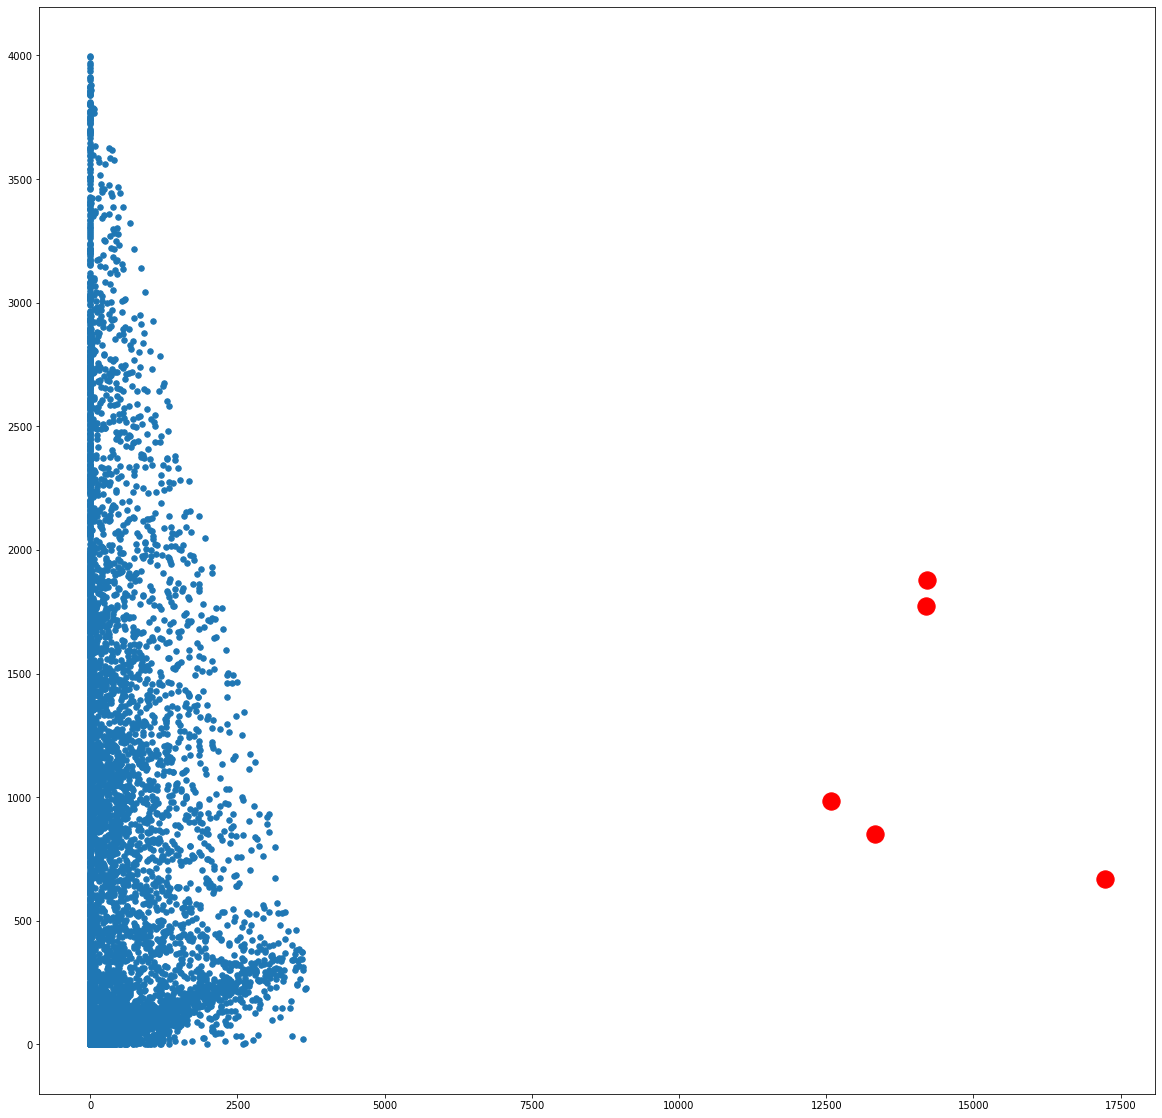

In [13]:
plt.figure(figsize=(20,20))
plt.scatter(df['PURCHASES'] , df['BALANCE'] , s = 30)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')


In [26]:
cluster0 = df[ df['labels'] == 0.0 ]
cluster1 = df[df['labels']==1.0]
cluster2 = df[df['labels']==2.0]

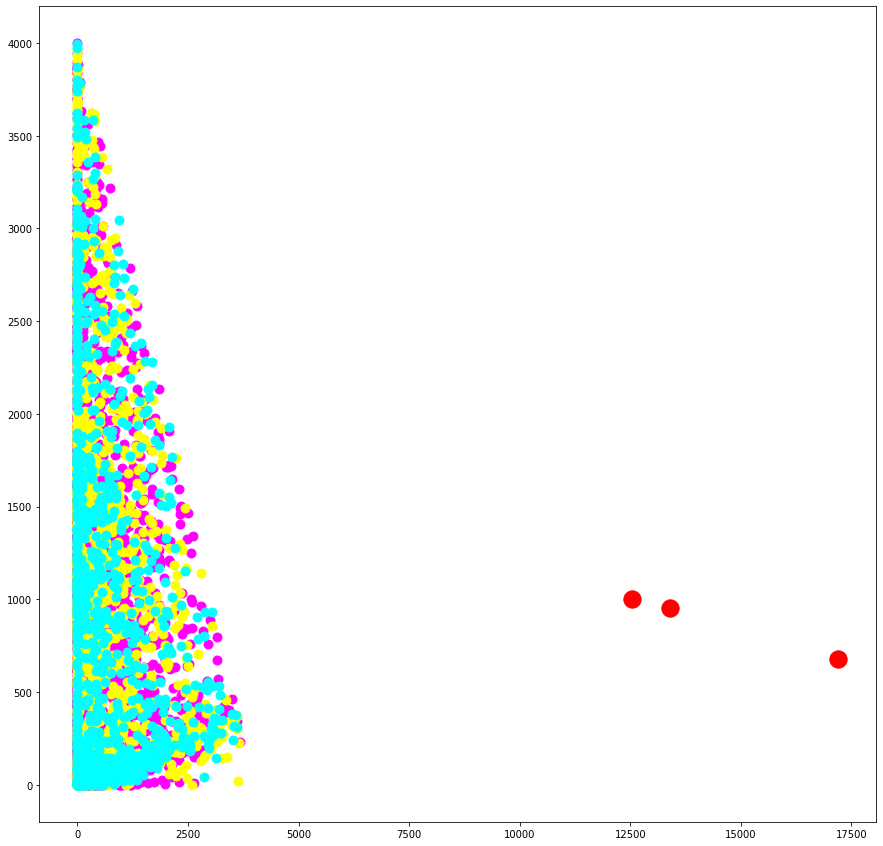

In [27]:
plt.figure(figsize=(15,15))
# plt.scatter(df['PURCHASES'] , df['BALANCE'] , s = 30)

plt.scatter(cluster0['PURCHASES'],          
            cluster0['BALANCE'],s=80,c='magenta',label='Careful')
plt.scatter(cluster1['PURCHASES'],          
            cluster1['BALANCE'],s=80,c='yellow',label='Standard')

plt.scatter(cluster2['PURCHASES'],          
            cluster2['BALANCE'],s=80,c='CYAN',label='Careless')

plt.scatter(kmeans2.cluster_centers_[:, 0], kmeans2.cluster_centers_[:, 1], s=300, c='red', label = 'Centroids')
